In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('housing.csv')

# loading in the data that we are to define as out features 
features = ['housing_median_age',
              'total_rooms',
              'total_bedrooms',
              'population',
              'households',
              'median_income'
              ]

X = df[features]
X = X.fillna(X.mean()) # just incase we are missing some values
# loading in the data that we are to define as our target
target = df['median_house_value']
# Feature scaling (z-score)
X = X.values # converting the dataframe to a numpy array
# to make it easier to work with numpy arrays
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_scaled = (X - X_mean) / X_std
y = target.values # converting the target to a numpy array
m = X_scaled.shape[0] # number of samples or m in which the .shape[0] method returns row count,
# and the hstack function is used to stack arrays in sequence horizontally (column-wise).
X_b = np.hstack([X_scaled, np.ones((m, 1))]) # adding a bias term or b
n_features = X_b.shape[1] # number of features or n in which the .shape[1] method returns column count
w = np.zeros(n_features)



In [2]:
def compute_cost(X, y, w):
    y_pred = X @ w # matrix multiplication to get the predicted values, did not know you could use the @ operator for matrix multiplication
    return np.mean((y_pred - y) ** 2) # computing the cost function, which is the mean squared error between the predicted and actual values


In [3]:
def compute_gradient(X, y, w):
    m = len(y)
    y_pred = X @ w
    grad = (2 / m) * (X.T @ (y_pred - y))
    return grad


In [4]:
alpha = 0.001       # learning rate, you can tune this
num_iters = 100000             #number of iterations, can adjust
cost_history = []

for i in range(num_iters):
    grad = compute_gradient(X_b, target, w)
    w -= alpha * grad
    if i % 100 == 0:
        cost = compute_cost(X_b, target, w)
        cost_history.append(cost)
        if i % 1000 == 0:
            print(f"Iter {i}, Cost: {cost:.2f}")


Iter 0, Cost: 55906711406.89
Iter 1000, Cost: 7224553271.65
Iter 2000, Cost: 6162418010.55
Iter 3000, Cost: 6046379773.24
Iter 4000, Cost: 5977790062.77
Iter 5000, Cost: 5929040405.11
Iter 6000, Cost: 5893575753.60
Iter 7000, Cost: 5867404764.71
Iter 8000, Cost: 5847878599.93
Iter 9000, Cost: 5833186844.89
Iter 10000, Cost: 5822061425.42
Iter 11000, Cost: 5813595347.15
Iter 12000, Cost: 5807128607.69
Iter 13000, Cost: 5802174310.81
Iter 14000, Cost: 5798369432.99
Iter 15000, Cost: 5795441120.51
Iter 16000, Cost: 5793183053.17
Iter 17000, Cost: 5791438521.66
Iter 18000, Cost: 5790088104.20
Iter 19000, Cost: 5789040570.84
Iter 20000, Cost: 5788226100.11
Iter 21000, Cost: 5787591180.02
Iter 22000, Cost: 5787094752.84
Iter 23000, Cost: 5786705287.66
Iter 24000, Cost: 5786398550.36
Iter 25000, Cost: 5786155901.03
Iter 26000, Cost: 5785962991.86
Iter 27000, Cost: 5785808770.18
Iter 28000, Cost: 5785684714.29
Iter 29000, Cost: 5785584247.50
Iter 30000, Cost: 5785502288.49
Iter 31000, Cost: 57

In [5]:
coefs = w[:-1] / X_std
intercept = w[-1] - np.sum((w[:-1] * X_mean) / X_std)

print("\nLearned coefficients (dollars per unit):", coefs)
print("Learned intercept (base price):", intercept)



Learned coefficients (dollars per unit): [ 1.86777953e+03 -1.83473815e+01  7.39321745e+01 -3.65554402e+01
  1.50790487e+02  4.72746606e+04]
Learned intercept (base price): -44244.578297995875


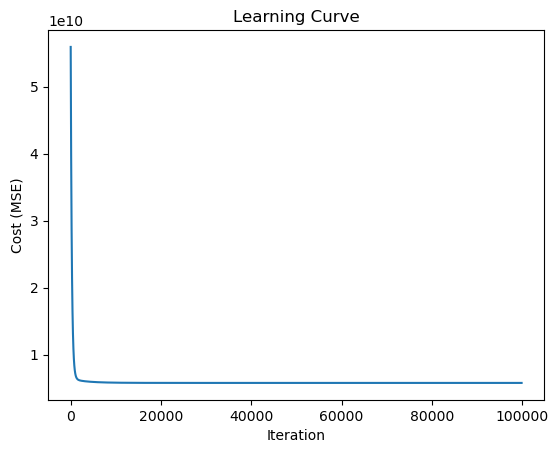

X shape: (20640, 6)
y shape: (20640,)
w shape: (7,)
grad shape: (7,)


In [6]:
import matplotlib.pyplot as plt
plt.plot(np.arange(0, num_iters, 100), cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.title('Learning Curve')
plt.show()
print("X shape:", X.shape)
print("y shape:", y.shape)
print("w shape:", w.shape)
print("grad shape:", grad.shape)


In [10]:
from sklearn.metrics import mean_squared_error, r2_score

beta_orig     = w[:-1] / X_std        #  w_feature / σ
intercept_orig = w[-1] - (X_mean / X_std) @ w[:-1]

y_pred = X @ beta_orig + intercept_orig

rmse = np.sqrt(mean_squared_error(y  ,y_pred))
r2   = r2_score(y, y_pred)
print(f"RMSE: ${rmse:,.0f}")
print(f"R²  : {r2:.3f}")


RMSE: $76,059
R²  : 0.566


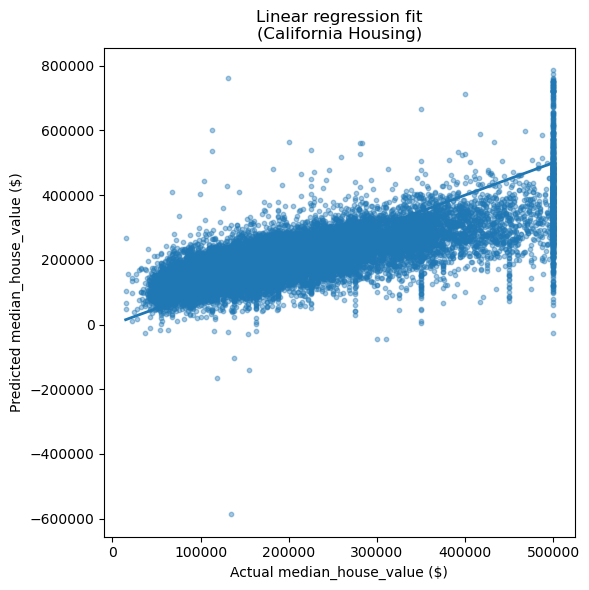

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y, y_pred, alpha=0.4, s=10)   # each dot = one block group
plt.plot([y.min(), y.max()], [y.min(), y.max()], lw=2)  # 45° line
plt.xlabel("Actual median_house_value ($)")
plt.ylabel("Predicted median_house_value ($)")
plt.title("Linear regression fit\n(California Housing)")
plt.tight_layout()
plt.show()
